# IPL Score Prediction using Deep Learning

# Import Libraries 

In [4]:
# Import Necessary Libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import keras 
import tensorflow as tf 


In [5]:
#Load dataset
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\ipl_data.csv", index_col=0)
df

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
mid,,,,,,,,,,,,,,
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129


# Exploratory Data Analysis 

In [6]:
df.head()

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
mid,,,,,,,,,,,,,,
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [7]:
df.columns

Index(['date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler', 'runs',
       'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [8]:
df = df.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker', 'non-striker'], axis =1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76014 entries, 1 to 617
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   venue      76014 non-null  object
 1   bat_team   76014 non-null  object
 2   bowl_team  76014 non-null  object
 3   batsman    76014 non-null  object
 4   bowler     76014 non-null  object
 5   total      76014 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 4.1+ MB


In [10]:
# statistical analysis 
df.describe()

,total
count,76014.000000
mean,160.901452
std,29.246231
min,67.000000
25%,142.000000
50%,162.000000
75%,181.000000
max,263.000000


In [11]:
df.shape

(76014, 6)

In [12]:
# Number of Unique Values in each column
df.nunique()

venue         35
bat_team      14
bowl_team     14
batsman      411
bowler       329
total        138
dtype: int64

In [13]:
# Datatypes of all Columns
df.dtypes

venue        object
bat_team     object
bowl_team    object
batsman      object
bowler       object
total         int64
dtype: object

In [ ]:
# Handling Null Values

In [14]:
df.head()

,venue,bat_team,bowl_team,batsman,bowler,total
mid,,,,,,
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222


In [15]:
df.isna().sum()

venue        0
bat_team     0
bowl_team    0
batsman      0
bowler       0
total        0
dtype: int64

In [16]:
# Check duplicated values
df.duplicated().sum()

60440

In [17]:
duplicated = df[df.duplicated()]

In [18]:
duplicated.to_excel("duplicate_data.xlsx",index=False)

In [19]:
# Remove duplicated values
data = df.drop_duplicates()

In [20]:
data.duplicated().sum()

0

# Data Visualization 

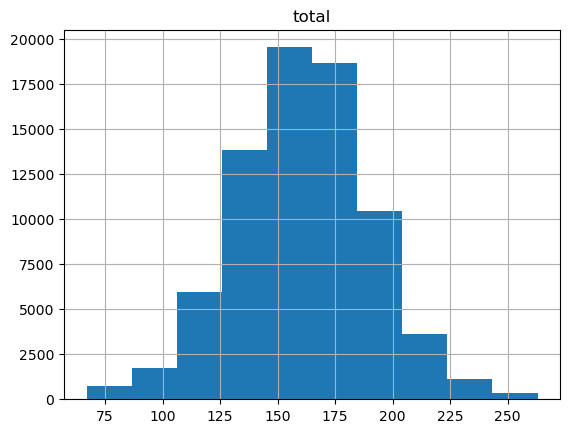

In [21]:
# Histogram
df.hist()
plt.show()

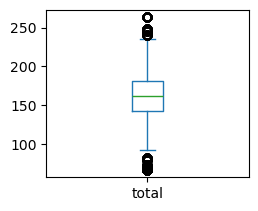

In [22]:
# Boxplot
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(12,10))
plt.show()

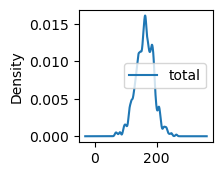

In [24]:
# Density Plot
df.plot(kind='density', subplots=True, layout=(5,5), figsize=(10,10))
plt.show()

In [25]:
X = df.drop(['total'], axis =1)
y = df['total']

In [26]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder


In [27]:
# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

In [28]:
# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [ ]:
# Train and Test Split

In [29]:
# Train test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [31]:
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building 

# Neural Network 

In [32]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)), 
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

In [33]:
# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

In [ ]:
# Model Training 

In [34]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 [==============================] - 26s 24ms/step - loss: 31.6495 - val_loss: 22.0709
Epoch 2/50
832/832 [==============================] - 16s 19ms/step - loss: 22.3394 - val_loss: 22.0090
Epoch 3/50
832/832 [==============================] - 15s 18ms/step - loss: 22.2569 - val_loss: 22.1717
Epoch 4/50
832/832 [==============================] - 25s 30ms/step - loss: 22.2558 - val_loss: 21.9398
Epoch 5/50
832/832 [==============================] - 18s 22ms/step - loss: 22.1915 - val_loss: 21.9940
Epoch 6/50
832/832 [==============================] - 17s 21ms/step - loss: 22.1806 - val_loss: 22.0818
Epoch 7/50
832/832 [==============================] - 18s 21ms/step - loss: 22.1307 - val_loss: 21.7877
Epoch 8/50
832/832 [==============================] - 20s 24ms/step - loss: 22.1009 - val_loss: 21.9314
Epoch 9/50
832/832 [==============================] - 17s 20ms/step - loss: 22.0889 - val_loss: 22.0350
Epoch 10/50
832/832 [==============================] - 21s 25ms/

<Axes: >

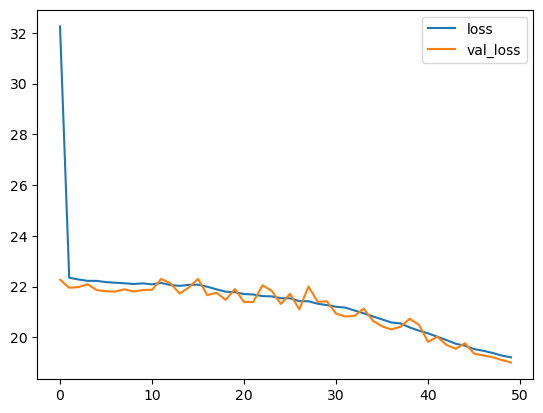

In [144]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [ ]:
# Model Evaluation 

In [146]:
#Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 [==============================] - 3s 4ms/step


19.496008022436314

In [147]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings("ignore")


In [149]:
venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output
        

        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])
        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)

In [150]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()

# Deployment 

In [154]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [157]:
# pipeline
processor = ColumnTransformer(
   transformers =  [
       ("Handling Missing Values",SimpleImputer(strategy = "most_frequent"),X.columns)
   ] )
from sklearn.pipeline import make_pipeline
pipeline = Pipeline(steps=[
    ("Processor",processor),
    ("Neural_Network_model",model)
])

In [159]:
pipeline.fit(X,y)

2376/2376 [==============================] - 28s 11ms/step - loss: 56.1077


Pipeline(steps=[('Processor',
                 ColumnTransformer(transformers=[('Handling Missing Values',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  Index(['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler'], dtype='object'))])),
                ('Neural_Network_model',
                 <keras.engine.sequential.Sequential object at 0x000001C346DB2B10>)])

In [161]:
from sklearn import set_config
set_config(display="diagram")
pipeline

Pipeline(steps=[('Processor',
                 ColumnTransformer(transformers=[('Handling Missing Values',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  Index(['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler'], dtype='object'))])),
                ('Neural_Network_model',
                 <keras.engine.sequential.Sequential object at 0x000001C346DB2B10>)])

In [162]:
pipeline.predict(X)

2376/2376 [==============================] - 10s 4ms/step


array([[160.092  ],
       [147.1991 ],
       [147.1991 ],
       ...,
       [135.8947 ],
       [137.21307],
       [135.89471]], dtype=float32)

In [167]:
predictions = model.predict(X_test)

713/713 [==============================] - 3s 4ms/step


In [168]:
from sklearn.metrics import classification_report 
print(classification_report(y,pipeline.predict(X)))


2376/2376 [==============================] - 9s 4ms/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [1]:
import joblib

In [35]:
joblib.dump(model,"model.pkl")

['model.pkl']